In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/onlinedeliverydata-1.csv')

In [ ]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Neutral,Neutral,Neutral,Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Yes,Anytime (Mon-Sun),30 minutes,Strongly Agree,Neutral,Disagree,Strongly disagree,Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Disagree,Neutral,Disagree,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Yes,Anytime (Mon-Sun),45 minutes,Agree,Strongly Agree,Neutral,Neutral,Agree,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),Bakery items (snacks),Agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Strongly agree,Neutral,Agree,Disagree,Disagree,Neutral,Agree,Agree,Agree,Disagree,Disagree,Neutral,Yes,Anytime (Mon-Sun),30 minutes,Disagree,Agree,Agree,Neutral,Agree,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Disagree,Strongly agree,Strongly agree,Neutral,Neutral,Neutral,Disagree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Agree,Agree,Agree,Agree,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
df.shape

(388, 55)

In [ ]:
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import warnings

import folium
from IPython.display import HTML
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot

In [ ]:
df.corr()

,Age,Family size,latitude,longitude,Pin code
Age,1.000000,0.169982,0.006595,0.047500,0.137294
Family size,0.169982,1.000000,-0.053537,0.070126,-0.009402
latitude,0.006595,-0.053537,1.000000,-0.144234,-0.201813
longitude,0.047500,0.070126,-0.144234,1.000000,0.156119
Pin code,0.137294,-0.009402,-0.201813,0.156119,1.000000


In [ ]:
df.columns.values

array(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude',
       'longitude', 'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)',
       'Meal(P2)', 'Perference(P1)', 'Perference(P2)',
       'Ease and convenient', 'Time saving', 'More restaurant choices',
       'Easy Payment option', 'More Offers and Discount',
       'Good Food quality', 'Good Tracking system', 'Self Cooking',
       'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food',
       'Wrong order delivered', 'Missing item', 'Order placed by mistake',
       'Influence of time', 'Order Time', 'Maximum wait time',
       'Residence in busy location', 'Google Maps Accuracy',
       'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 

In [ ]:
df["Monthly Income"].value_counts()

No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: Monthly Income, dtype: int64

In [ ]:
df["Gender"].value_counts()

Male      222
Female    166
Name: Gender, dtype: int64

In [ ]:
df["Marital Status"].value_counts()

Single               268
Married              108
Prefer not to say     12
Name: Marital Status, dtype: int64

In [ ]:
df["Occupation"].value_counts()

Student           207
Employee          118
Self Employeed     54
House wife          9
Name: Occupation, dtype: int64

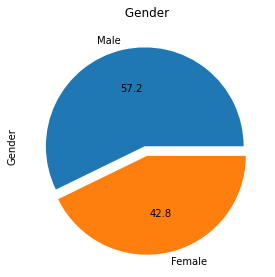

In [ ]:
plt.figure(1)
plt.subplot(221)
df['Gender'].value_counts().plot.pie(title=' Gender',figsize=(20,10),autopct="%1.1f",explode=[0,.1])

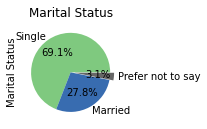

In [ ]:

plt.figure(1)
plt.subplot(221)
df['Marital Status'].value_counts().plot.pie(title='Marital Status',cmap="Accent",autopct="%1.1f%%",explode=[0,0,0.1])

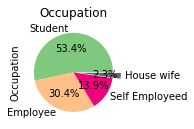

In [ ]:
plt.subplot(223)
df['Occupation'].value_counts().plot.pie(title='Occupation',cmap="Accent",autopct="%1.1f%%",explode=[0,0,0,0.2])

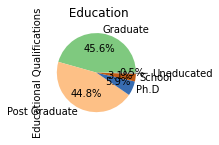

In [ ]:
plt.subplot(223)
df['Educational Qualifications'].value_counts().plot.pie(title=' Education',cmap="Accent",autopct="%1.1f%%",explode=[0,0,0,0,0.3])

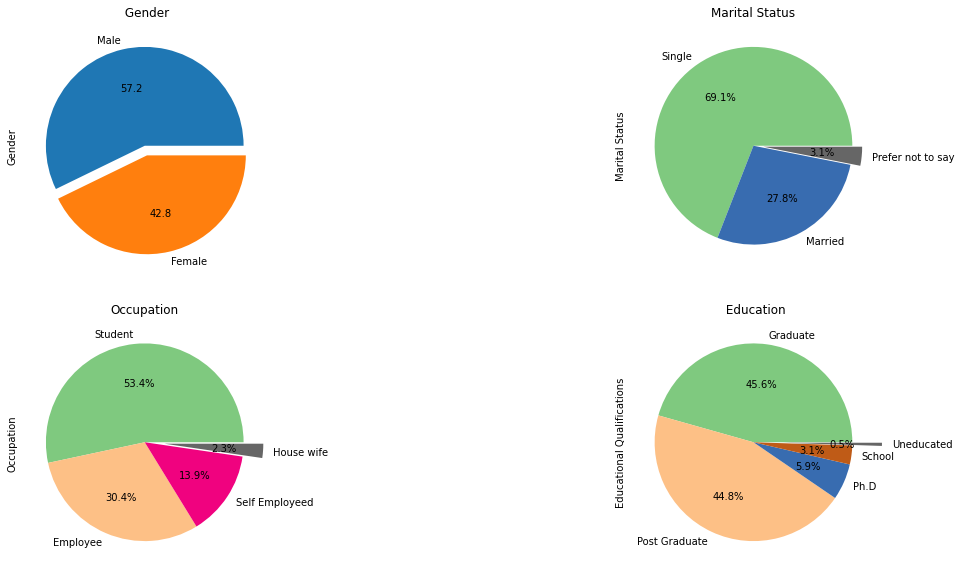

In [ ]:
plt.figure(1)
plt.subplot(221)
df['Gender'].value_counts().plot.pie(title=' Gender',figsize=(20,10),autopct="%1.1f",explode=[0,.1])
plt.subplot(222)
df['Marital Status'].value_counts().plot.pie(title='Marital Status',cmap="Accent",autopct="%1.1f%%",explode=[0,0,0.1])
plt.subplot(223)
df['Occupation'].value_counts().plot.pie(title='Occupation',cmap="Accent",autopct="%1.1f%%",explode=[0,0,0,0.2])
plt.subplot(224)
df['Educational Qualifications'].value_counts().plot.pie(title=' Education',cmap="Accent",autopct="%1.1f%%",explode=[0,0,0,0,0.3])

Los datos sobre los consumidores que piden delivery son: Hay más hombres que mujeres, la mayoría está divorciado, la mayoría son estudiantes o empleados y hay un empate entre graduados y post graduado

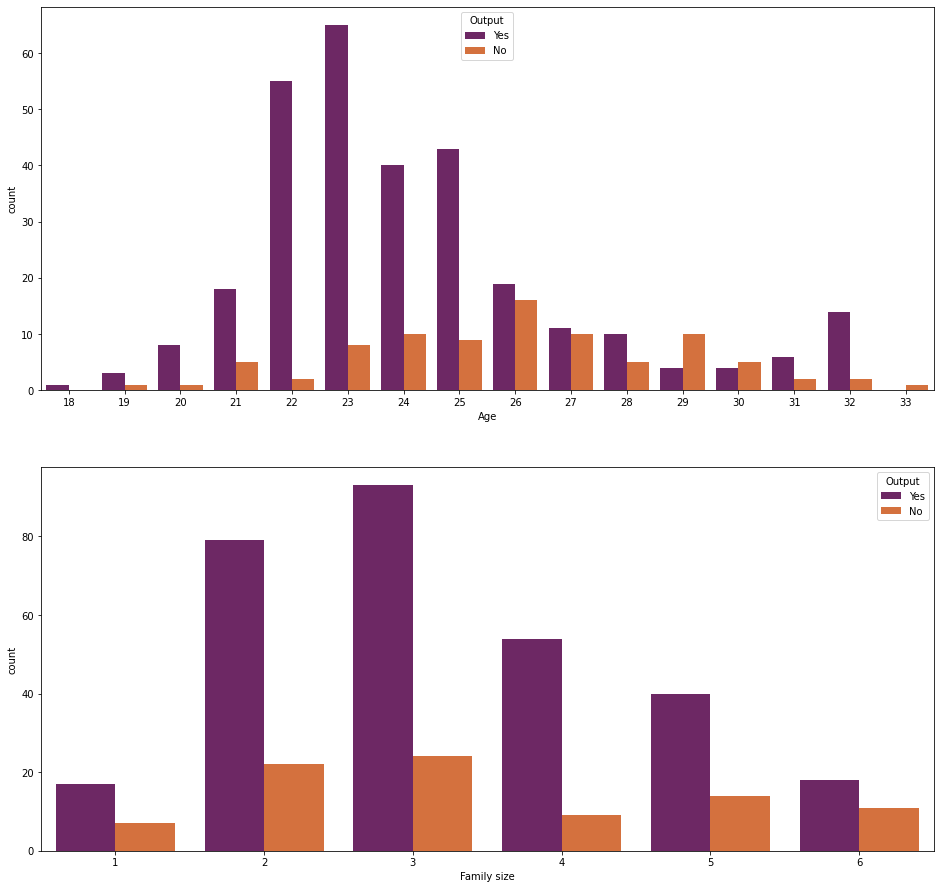

In [ ]:
%matplotlib inline

_ = [0, 6]
_ = list(enumerate([list(df.columns)[i] for i in _], start=1))

fig = plt.figure(figsize=[16,24])
for index, col_name in _:
    ax = fig.add_subplot(3, 1, index)    
    sns.countplot(x=col_name, data=df, hue='Output', palette='inferno')

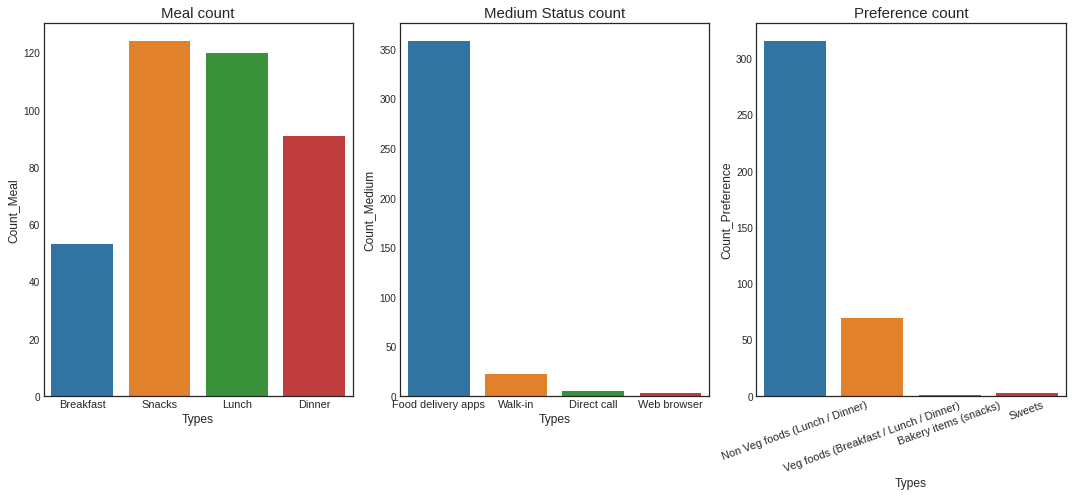

In [ ]:

plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')


plt.subplot(1,3,1)
ax = sns.countplot(x="Meal(P1)", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Meal count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Meal', fontsize = 12)
plt.tight_layout()


plt.subplot(1,3,2)
ax = sns.countplot(x="Medium (P1)", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Medium Status count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Medium', fontsize = 12)
plt.tight_layout()


plt.subplot(1,3,3)
ax = sns.countplot(x="Perference(P1)", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=20)
ax.set_title('Preference count',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count_Preference', fontsize = 12)
plt.tight_layout()

Las preferencias de los consumidores